# Fitbit Sleep

Insights:
- Average Time in Bed is 7:17
- Average Time Asleep is 6:20
- Average Time it takes to fall asleep is 57 minutes
- REM Sleep Percentage is 21.74%
- Avg. Bed Time 2:51AM
- Avg. Wake Time 10:09AM

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
% matplotlib inline

sleep_20180325_20180424 = pd.read_csv('../data/fitbit_sleep_20180325_20180424.csv',header=1)
sleep_20180425_20180511 = pd.read_csv('../data/fitbit_sleep_20180425_20180511.csv',header=1)

sleep = pd.DataFrame()
sleep = pd.concat([sleep_20180425_20180511, sleep_20180325_20180424], ignore_index=True)

# Convert to DateTime
sleep['Start Time'] = pd.to_datetime(sleep['Start Time'])
sleep['End Time'] = pd.to_datetime(sleep['End Time'])

sleep.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2018-05-11 02:53:00,2018-05-11 10:54:00,415,66,40,481,105.0,269.0,41.0
1,2018-05-10 00:56:00,2018-05-10 07:28:00,342,50,28,392,95.0,179.0,68.0
2,2018-05-10 10:36:00,2018-05-10 13:28:00,150,17,1,172,NaN,NaN,NaN
3,2018-05-09 02:15:00,2018-05-09 08:45:00,337,53,42,390,62.0,209.0,66.0
4,2018-05-08 00:31:00,2018-05-08 07:59:00,385,63,34,448,73.0,238.0,74.0


## Check Average Sleep (No Naps)

I consider anything under 3 hours a nap, So let's look at non-nap sleeps.

In [3]:
sleep_nonap = sleep[sleep['Time in Bed'] >= (3*60)]

Mean Hours Asleep: 6.343402777777778
Std. Dev. Hours Asleep: 1.1434815753995218


/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


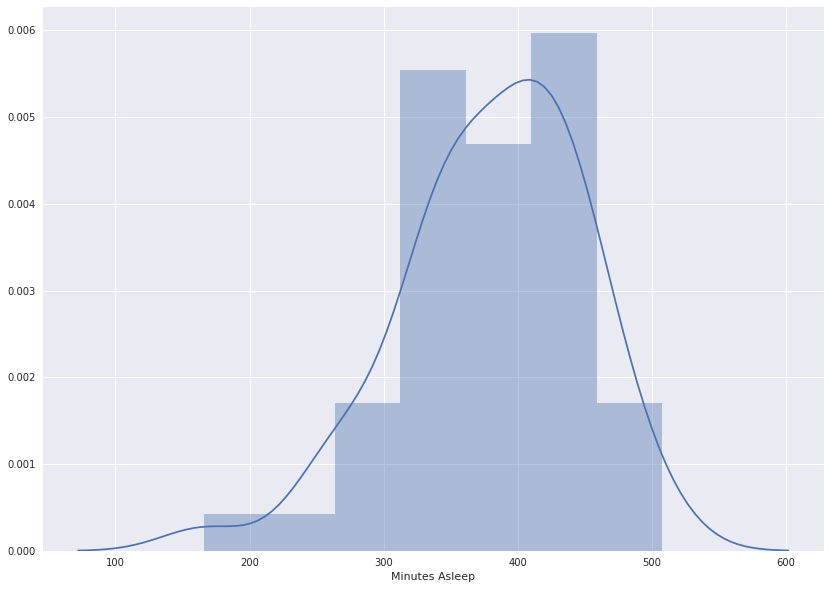

In [4]:
# Asleep Distribution

print("Mean Hours Asleep: {0}".format(sleep_nonap['Minutes Asleep'].mean()/60))
print("Std. Dev. Hours Asleep: {0}".format(sleep_nonap['Minutes Asleep'].std()/60))

plt.figure(figsize=(14,10))
sns.distplot(sleep_nonap['Minutes Asleep'])

In [5]:
k2, p = stats.normaltest(sleep_nonap['Minutes Asleep'])
alpha = .5
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.0490323
The null hypothesis can be rejected


Mean Hours Time in Bed: 7.289930555555555
Std. Dev. Hours Time in Bed: 1.2700483953444224


/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


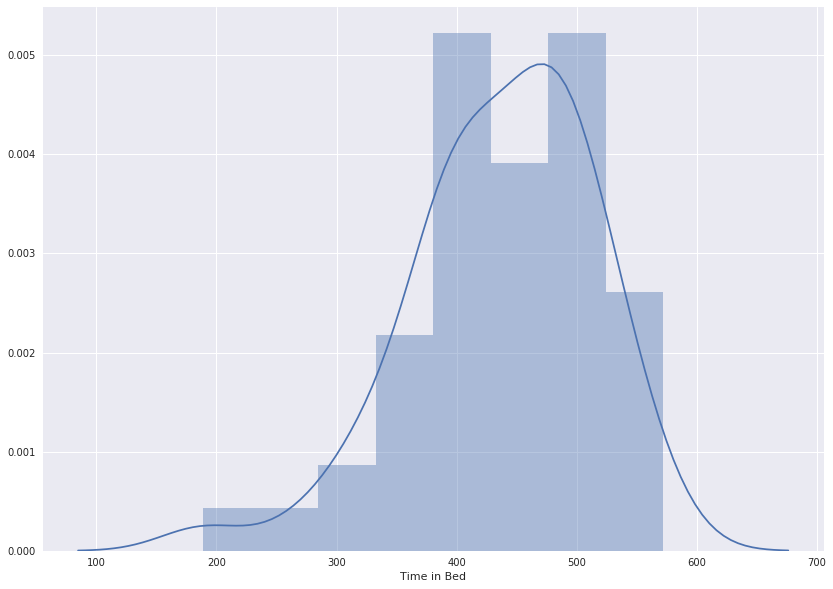

In [6]:
# Time in Bed Distribution

print("Mean Hours Time in Bed: {0}".format(sleep_nonap['Time in Bed'].mean()/60))
print("Std. Dev. Hours Time in Bed: {0}".format(sleep_nonap['Time in Bed'].std()/60))

plt.figure(figsize=(14,10))
sns.distplot(sleep_nonap['Time in Bed'])

<Figure size 1008x720 with 0 Axes>

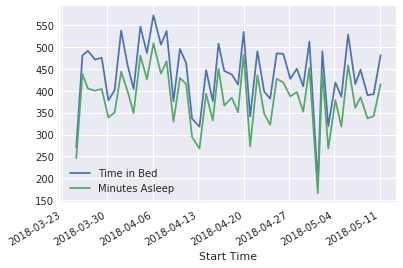

In [7]:
plt.figure(figsize=(14,10))
sleep_nonap[['Start Time', 'Time in Bed', 'Minutes Asleep']].set_index('Start Time').plot()

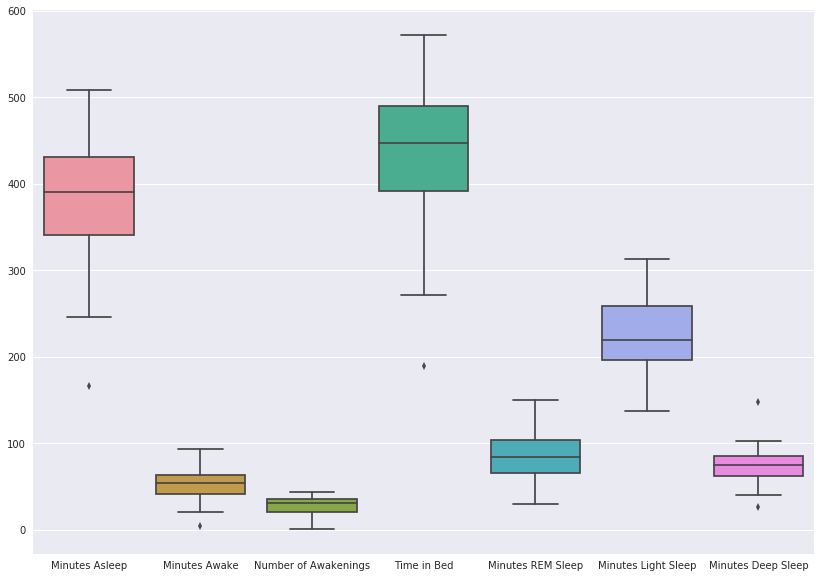

In [8]:
plt.figure(figsize=(14,10))
sns.boxplot(data=sleep_nonap.iloc[:,2:])

In [9]:
# Minutes to Fall Asleep

(sleep_nonap['Time in Bed'] - sleep_nonap['Minutes Asleep']).mean()

56.791666666666664

In [10]:
# REM Sleep

print("{0:.2f}%".format((sleep_nonap['Minutes REM Sleep'] / sleep_nonap['Minutes Asleep']).mean() * 100))

21.74%


Mean Start Time: 2:52
Mean End Time: 10:10


/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


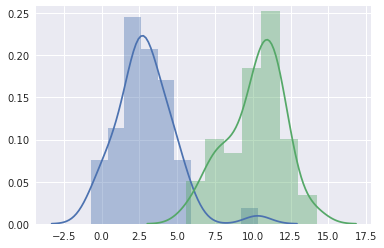

In [16]:
start = (sleep_nonap['Start Time'].dt.hour + sleep_nonap['Start Time'].dt.minute/60)
end = (sleep_nonap['End Time'].dt.hour + sleep_nonap['End Time'].dt.minute/60)

start = [x - 24 if x >= 18 else x for x in start]
end = [x - 24 if x >= 18 else x for x in end]
# Range is from 18:00 to 17:59 (-6 to 17.99) to account for midnight roll over in distribution

start_comp = np.mean(start)
start_hour = int(np.floor(start_comp))
start_minute = int(np.round(60 * (start_comp - start_hour)))

end_comp = np.mean(end)
end_hour = int(np.floor(end_comp))
end_minute = int(np.round(60 * (end_comp - end_hour)))

print("Mean Start Time: {0}:{1}".format(start_hour, start_minute))
print("Mean End Time: {0}:{1}".format(end_hour, end_minute))

sns.distplot(start)
sns.distplot(end)